![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Bike store sales

Let's put in practice the topics covered in the course and analyze sales made in a Bike Shop.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [77]:
import numpy as np
import pandas as pd

In [78]:
sales = pd.read_csv('data/sales_data.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### First look at our data

Analyze what columns we have, what type they are and what data is on them.

In [79]:
sales.shape

(5000, 16)

In [80]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [6]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4995,2014-01-27,27,January,2014,34,M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,58,98
4996,2014-07-14,14,July,2014,17,M,France,Val d'Oise,Clothing,Caps,AWC Logo Cap,12,7,9,1,85
4997,2013-12-30,30,December,2013,25,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,433,693
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32
4999,2014-03-09,9,March,2014,50,F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,25


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing column types

- Cast `Date` to `datetime`.
- Cast `Customer_Gender`, `Country`, `State`, `Product_Category` and `Sub_Category` to `category`.

In [82]:
# your code goes here
# datetime
sales['Date'] = pd.to_datetime(sales['Date'])
# category
for col in [['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']]:
    sales[col] = sales[col].astype('category')


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a summary of the main statistics of the whole data

In [83]:
# your code goes here
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
std,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [84]:
# your code goes here
sales['Customer_Age'].mean()

35.9338

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

<AxesSubplot:ylabel='Density'>

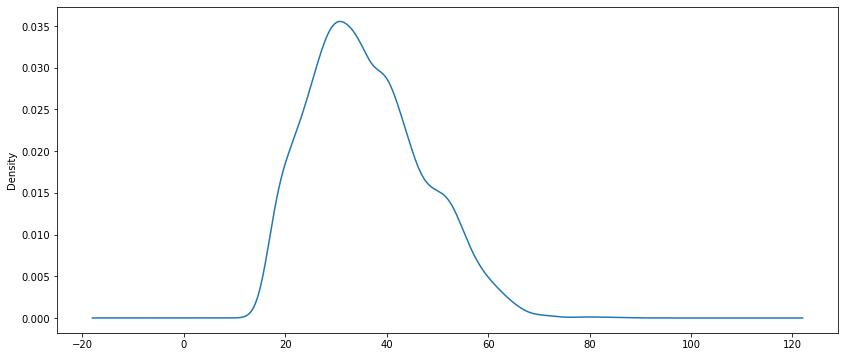

In [99]:
# your code goes here
# density (KDE) plot of Customer_Age
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))


<AxesSubplot:>

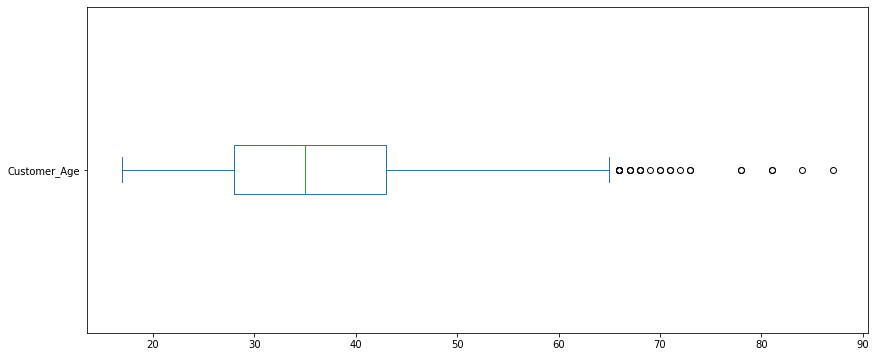

In [100]:
# box plot of Customer_Age
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [89]:
# your code goes here
sales['Order_Quantity'].mean()

11.8204

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

<AxesSubplot:ylabel='Frequency'>

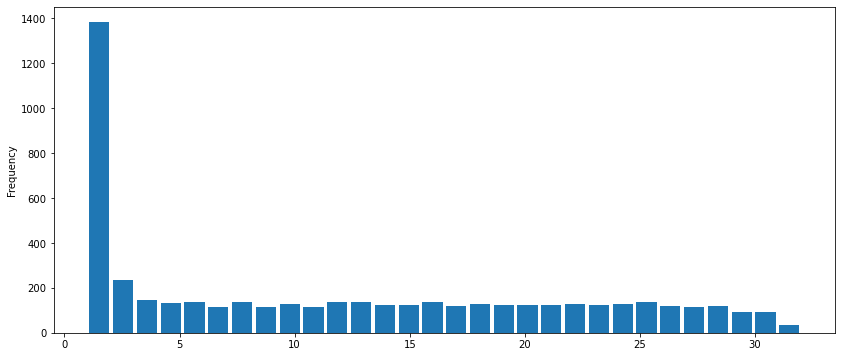

In [103]:
# your code goes here
# histogram plot of Order_Quantity
sales['Order_Quantity'].plot(kind='hist', bins=30, rwidth=0.85, figsize=(14,6))

<AxesSubplot:>

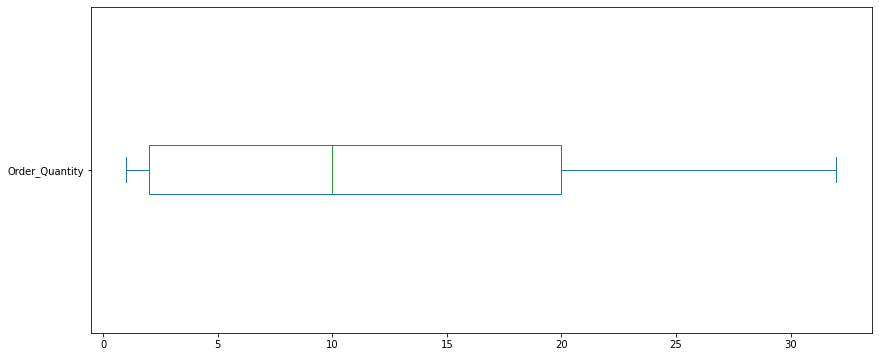

In [104]:
# box plot of Order_Quantity
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### In which countries were sales made?

In [97]:
# your code goes here
sales['Country'].unique()


['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort sales by year

Older sales should be at the bottom.

In [110]:
# your code goes here
sales.sort_values(['Year'], ascending=False, inplace=True)
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
3962,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,35,533,858
2190,2016-02-01,1,February,2016,30,M,Canada,British Columbia,Clothing,Gloves,"Half-Finger Gloves, L",14,9,24,207,333
2175,2016-03-22,22,March,2016,61,F,Australia,New South Wales,Accessories,Tires and Tubes,LL Road Tire,5,8,21,51,91
2178,2016-01-26,26,January,2016,35,M,Germany,Bayern,Accessories,Tires and Tubes,Road Tire Tube,4,1,4,12,16
2261,2016-01-21,21,January,2016,39,M,Australia,New South Wales,Clothing,Vests,"Classic Vest, M",4,24,64,127,223


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Reset the current index

Don't keep the old index.

In [111]:
# your code goes here
sales.reset_index(drop=True, inplace=True)
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,35,533,858
1,2016-02-01,1,February,2016,30,M,Canada,British Columbia,Clothing,Gloves,"Half-Finger Gloves, L",14,9,24,207,333
2,2016-03-22,22,March,2016,61,F,Australia,New South Wales,Accessories,Tires and Tubes,LL Road Tire,5,8,21,51,91
3,2016-01-26,26,January,2016,35,M,Germany,Bayern,Accessories,Tires and Tubes,Road Tire Tube,4,1,4,12,16
4,2016-01-21,21,January,2016,39,M,Australia,New South Wales,Clothing,Vests,"Classic Vest, M",4,24,64,127,223


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [ ]:
# your code goes here
sales['Year'].value_counts()

Go ahead and show a <b>pie plot</b> and a <b>bar plot</b> with the previous data:

<AxesSubplot:ylabel='Year'>

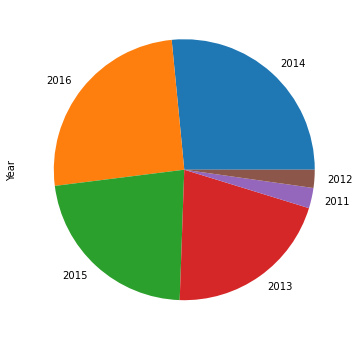

In [112]:
# your code goes here
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

<AxesSubplot:>

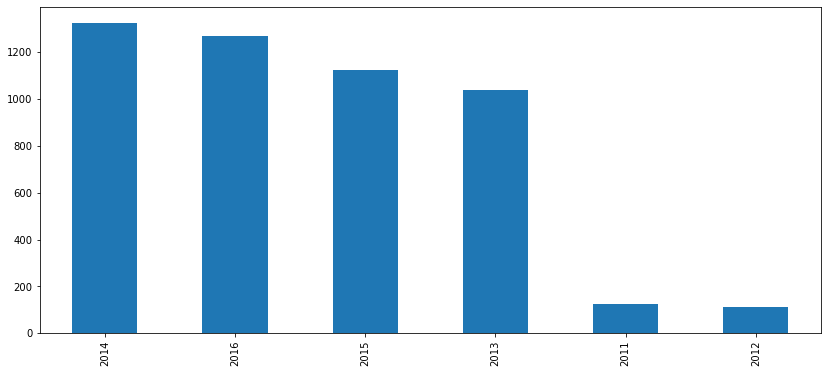

In [113]:
# your code goes here
sales['Year'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `Cost` column

This column should be:
$$ Cost = Unit\_Cost * Order\_Quantity $$

In [117]:
# your code goes here
sales['Cost'] = sales['Unit_Cost'] * sales['Order_Quantity']
sales['Cost']

0        325
1        126
2         40
3          4
4         96
        ... 
4995    4665
4996    1266
4997    4665
4998    2532
4999    4665
Name: Cost, Length: 5000, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `YearMonth` column

This new `YearMonth` column should be the concatenation of `Year` and `Month` columns, separated by a '-'.

In [119]:
# your code goes here
sales['YearMonth'] = sales['Year'].astype('str') + '_' + sales['Month']
sales['YearMonth']

0           2016_July
1       2016_February
2          2016_March
3        2016_January
4        2016_January
            ...      
4995    2011_November
4996     2011_October
4997       2011_March
4998       2011_April
4999         2011_May
Name: YearMonth, Length: 5000, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Count how many sales we have per `YearMonth`.

In [121]:
# your code goes here
sales['YearMonth'].value_counts()

2015_December    232
2016_April       218
2014_June        215
2013_December    215
2016_May         214
                ... 
2012_December      7
2012_February      6
2011_February      6
2011_June          6
2012_March         4
Name: YearMonth, Length: 62, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

<AxesSubplot:>

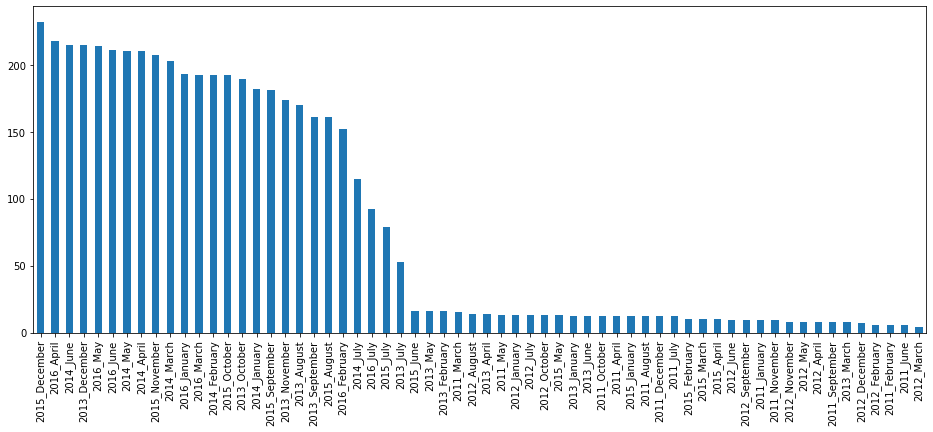

In [132]:
# your code goes here
sales['YearMonth'].value_counts().plot(kind='bar', figsize=(16,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [155]:
# your code goes here
sales['Country'].value_counts().head(1)

United States    1700
Name: Country, dtype: int64

Go ahead and show a <b>bar plot</b> of the sales per country:

<AxesSubplot:>

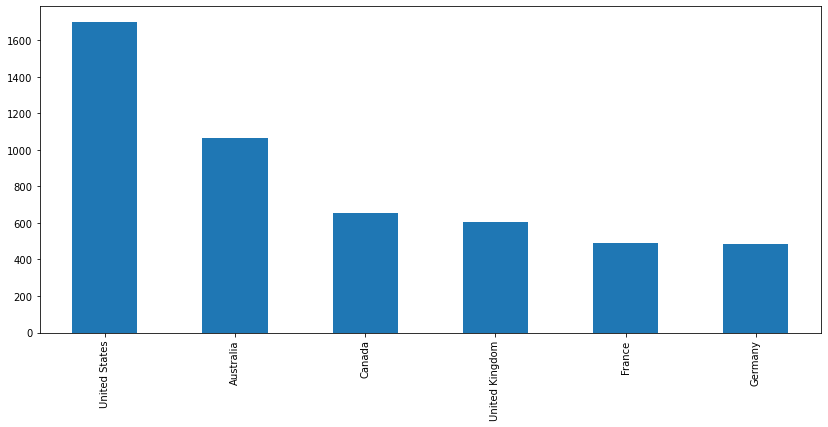

In [146]:
# your code goes here
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a list of every product sold

In [162]:
# your code goes here
sales['Product'].unique()

array(['Sport-100 Helmet, Red', 'Half-Finger Gloves, L', 'LL Road Tire',
       'Road Tire Tube', 'Classic Vest, M', 'Touring Tire Tube',
       'Mountain-200 Silver, 38', 'Water Bottle - 30 oz.',
       'Sport-100 Helmet, Blue', 'Half-Finger Gloves, S',
       'Half-Finger Gloves, M', 'Mountain-500 Black, 42',
       'Bike Wash - Dissolver', 'Long-Sleeve Logo Jersey, S',
       "Women's Mountain Shorts, M", 'Patch Kit/8 Patches',
       'Mountain Tire Tube', 'Sport-100 Helmet, Black',
       'Mountain Bottle Cage', 'LL Mountain Tire', 'Racing Socks, L',
       'AWC Logo Cap', 'Touring-1000 Blue, 46', 'Mountain-200 Black, 38',
       'Road-650 Red, 60', 'HL Mountain Tire', 'Fender Set - Mountain',
       'Road Bottle Cage', 'Short-Sleeve Classic Jersey, M',
       'Road-250 Red, 48', 'Road-350-W Yellow, 42',
       'Mountain-200 Silver, 46', 'Hydration Pack - 70 oz.',
       'Road-350-W Yellow, 40', 'HL Road Tire', 'Mountain-500 Black, 44',
       'ML Road Tire', 'Short-Sleeve Classic 

Create a **bar plot** showing the 10 most sold products (best sellers):

<AxesSubplot:>

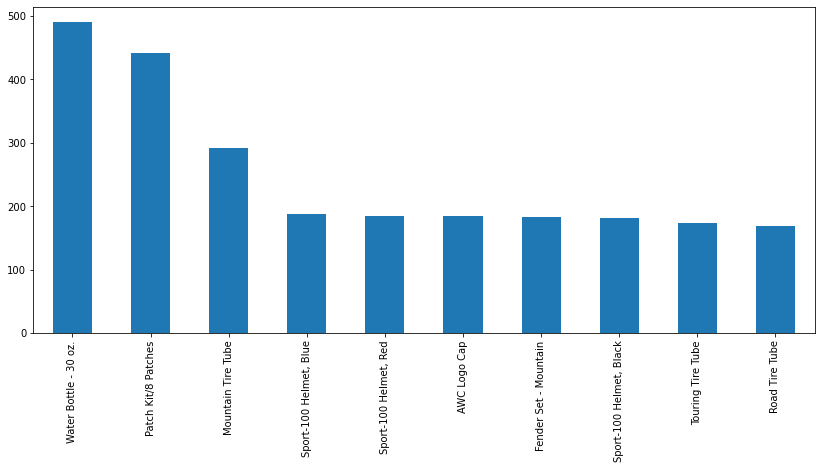

In [161]:
# your code goes here
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

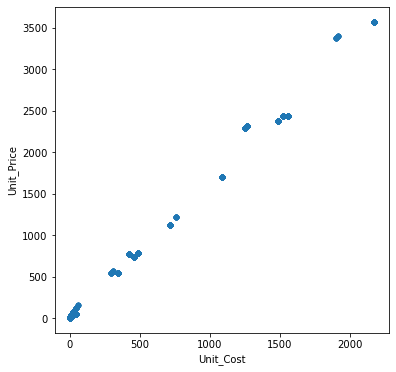

In [169]:
# your code goes here
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

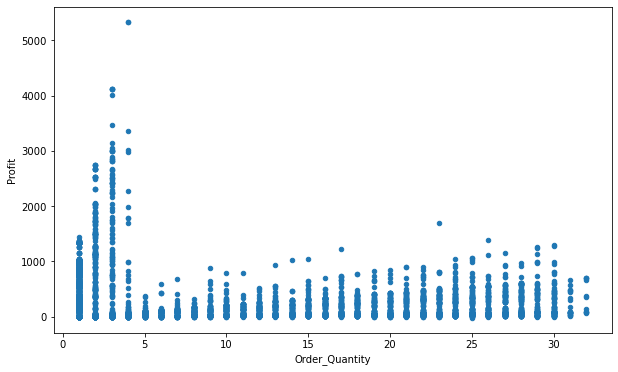

In [172]:
# your code goes here
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

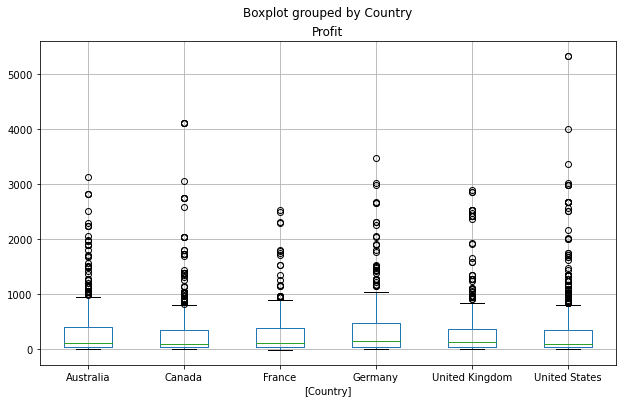

In [176]:
# your code goes here
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

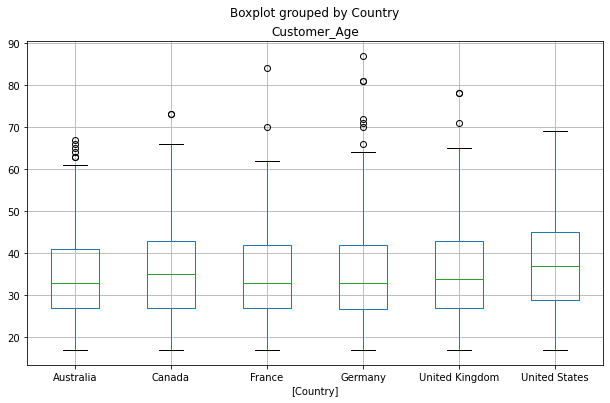

In [178]:
# your code goes here
sales[['Customer_Age','Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [180]:
# your code goes here
sales['Revenue'] += 50

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [188]:
# your code goes here
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

1146

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [198]:
# your code goes here
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]
#sales.head()

3

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [208]:
# your code goes here
sales.loc[sales['Country'] == 'France', 'State'].value_counts()

Seine (Paris)          101
Seine Saint Denis       87
Nord                    76
Yveline                 48
Hauts de Seine          41
Essonne                 40
Seine et Marne          16
Moselle                 16
Loiret                  13
Val d'Oise              11
Garonne (Haute)         10
Charente-Maritime       10
Pas de Calais            6
Val de Marne             5
Loir et Cher             5
Somme                    4
South Australia          0
Brandenburg              0
California               0
Tasmania                 0
Texas                    0
Saarland                 0
Utah                     0
Victoria                 0
Washington               0
British Columbia         0
Ohio                     0
Queensland               0
Oregon                   0
Nordrhein-Westfalen      0
Bayern                   0
New York                 0
New South Wales          0
Missouri                 0
Kentucky                 0
Hessen                   0
Hamburg                  0
G

Go ahead and show a <b>bar plot</b> with the results:

<AxesSubplot:>

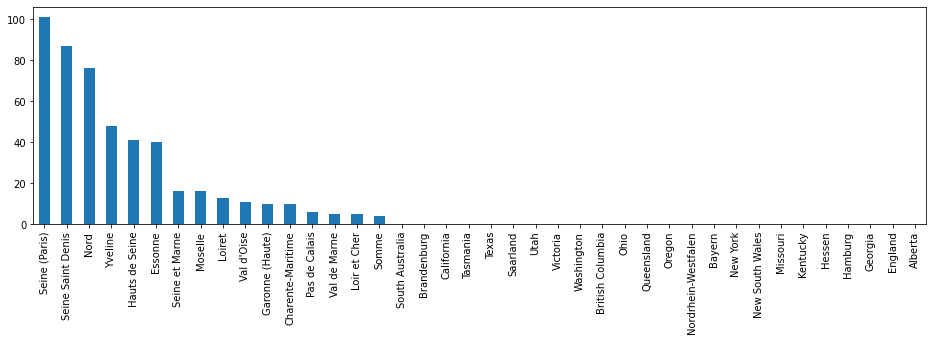

In [210]:
# your code goes here
sales.loc[sales['Country'] == 'France', 'State'].value_counts().plot(kind='bar', figsize=(16,4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [214]:
# your code goes here
sales['Product_Category'].value_counts()
# sales.head()

Accessories    3090
Bikes          1166
Clothing        744
Name: Product_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<AxesSubplot:ylabel='Product_Category'>

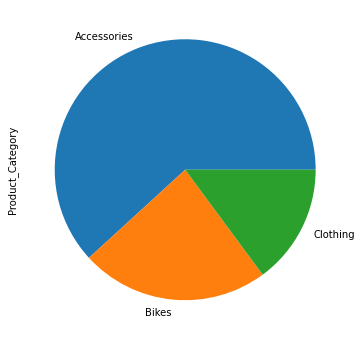

In [216]:
# your code goes here
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [229]:
# your code goes here
sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

Tires and Tubes      1458
Bottles and Cages     719
Helmets               553
Fenders               183
Cleaners               78
Hydration Packs        64
Bike Racks             26
Bike Stands             9
Gloves                  0
Jerseys                 0
Mountain Bikes          0
Road Bikes              0
Shorts                  0
Socks                   0
Caps                    0
Touring Bikes           0
Vests                   0
Name: Sub_Category, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

<AxesSubplot:>

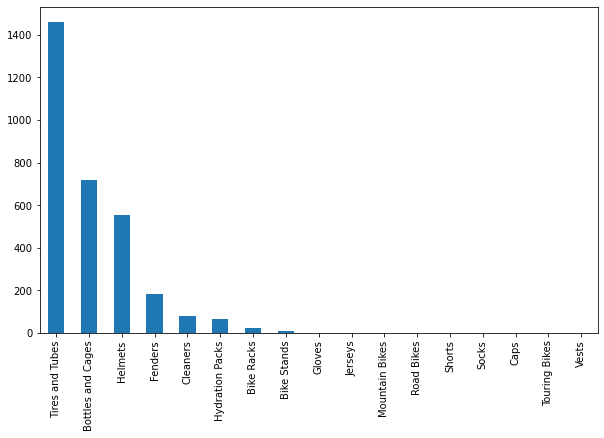

In [232]:
# your code goes here
sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts().plot(kind='bar', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [237]:
# your code goes here
sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

Road Bikes           600
Mountain Bikes       391
Touring Bikes        175
Bike Racks             0
Jerseys                0
Tires and Tubes        0
Socks                  0
Shorts                 0
Hydration Packs        0
Bike Stands            0
Helmets                0
Gloves                 0
Fenders                0
Cleaners               0
Caps                   0
Bottles and Cages      0
Vests                  0
Name: Sub_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<AxesSubplot:ylabel='Sub_Category'>

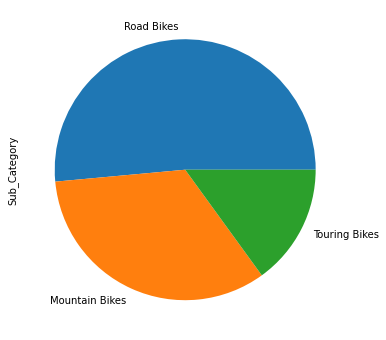

In [238]:
# your code goes here
sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [240]:
# your code goes here
sales['Customer_Gender'].value_counts()

M    2564
F    2436
Name: Customer_Gender, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [250]:
# your code goes here
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] > 500)].shape[0]

1058

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [252]:
# your code goes here
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4919,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,8684,2011_March
4985,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011_January
2360,2015-12-11,11,December,2015,44,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2015_December
4880,2011-12-29,29,December,2011,25,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2011_December
198,2016-01-28,28,January,2016,34,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2016_January


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [253]:
# your code goes here
sales.sort_values(['Revenue'], ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4919,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,8684,2011_March


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [258]:
# your code goes here
sales.loc[sales['Revenue'] > 10000, 'Order_Quantity'].mean()

3.25

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [259]:
# your code goes here
sales.loc[sales['Revenue'] < 10000, 'Order_Quantity'].mean()

11.834134615384615

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [267]:
# your code goes here
sales.loc[(sales['Year'] == 2016) & (sales["Month"] == 'May')].shape[0]


214

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [273]:
# your code goes here
sales.loc[(sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))].shape[0]

517

Show a grouped <b>box plot</b> per month with the profit values.

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

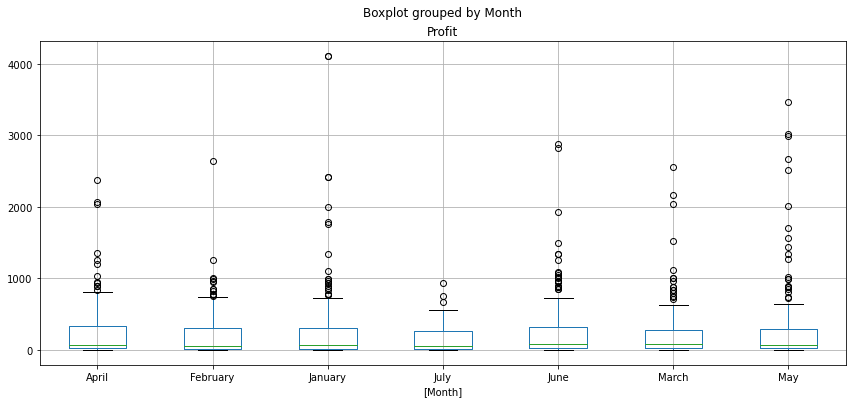

In [279]:
# your code goes here
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [290]:
# your code goes here
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
0,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,43.117384,533,908,325,2016_July
1,2016-02-01,1,February,2016,30,M,Canada,British Columbia,Clothing,Gloves,"Half-Finger Gloves, L",14,9,24.000000,207,383,126,2016_February
2,2016-03-22,22,March,2016,61,F,Australia,New South Wales,Accessories,Tires and Tubes,LL Road Tire,5,8,21.000000,51,141,40,2016_March
3,2016-01-26,26,January,2016,35,M,Germany,Bayern,Accessories,Tires and Tubes,Road Tire Tube,4,1,4.000000,12,66,4,2016_January
4,2016-01-21,21,January,2016,39,M,Australia,New South Wales,Clothing,Vests,"Classic Vest, M",4,24,64.000000,127,273,96,2016_January


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)